# Комментарий наставника
Привет! 

Кажется, отличная работа и я не нашел никаких серьезных просчетов, хотя честно пытался. Пара комментариев есть, но 
это именно что комментарии, а не серьезные замечания.

К сожалению, это первый такой проект и, возможно, я что-то упустил. Я стараюсь возвращаться к первым принятым проектам перед созвоном и, если будет что-то значимое, то я в каком-нибудь виде затрону это на созвоне.  

------------

# Шаг 4. Аналитика средствами Python

   - импортировать файлы 'query_1.csv' и 'query_3.csv';
   - изучить данные в них;
   - проверить типы данных на корректность;
   - выбрать топ-10 городов по количеству рейсов;
   - построить графики: модели самолетов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
   - сделать выводы по каждому из графиков, пояснить результат.

------------

In [2]:
from scipy import stats as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
model_airplane = pd.read_csv('/datasets/query_1.csv')

In [3]:
model_airplane.info()
model_airplane.head(8)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


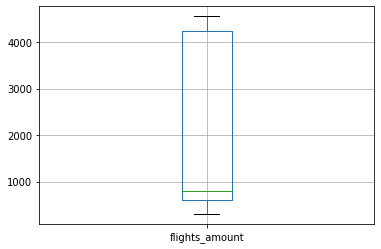

In [4]:
plt.figure()
bp = model_airplane.boxplot()

In [5]:
model_airplane.describe()

,flights_amount
count,8.000000
mean,2035.625000
std,1965.203947
min,300.000000
25%,605.250000
50%,795.000000
75%,4250.250000
max,4557.000000


Вывод 
----

   1. Данные и заполнение в таблице об информации о типах самолетов корректно.
   2. Выбросы данных отсуствуют
   3. Можно сделать вывод о том: что самым используемой моедлью самолета для пассажирских авиоперевозок являются среднемагисральные самолеты с вместимостью от 50 до 150 пассажиров.
   4. Существуют маршруты, где осуществляется интенсивный пассажиропоток, с чем связано использование моделей, которые вмещают значительное число пассажиров от 180 до 550 пассажиров
   5. Существуют направления где используются модели с маллой пассажирской вместимостью.

In [6]:
city_average_flights = pd.read_csv('/datasets/query_3.csv')
city_average_flights.info()
city_average_flights.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613


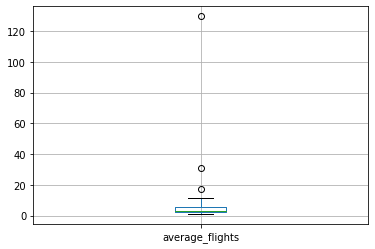

In [7]:
plt.figure()
bp = city_average_flights.boxplot()


In [8]:
city_average_flights.describe()

,average_flights
count,101.000000
mean,5.494189
std,13.119790
min,1.000000
25%,2.000000
50%,3.000000
75%,5.870968
max,129.774194


In [9]:
city_average_flights.head()

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613


Вывод
----

   1. Данные и заполнение в таблице об информации о городах и средних показателях количества авиорейсов заполненны корректно.
   2. При анализе видно, что существуют выброс данных по среднему количеству рейсов. Выборы проходят выше границы 8,805 количество среднедневных полетов.
   3. Можно сделать вывод, что в сентябре существуют как очень популярные направления, когда среднедневное количесво рейсосв составляет около 130 и не популярные направления, когда среднее количество рейсов в день равно 1

In [10]:
city_average_flights.sort_values(by='average_flights', ascending=False).head(10)  

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


In [11]:
city_average_flights_TOP_10 = city_average_flights[city_average_flights['average_flights'] > 9]

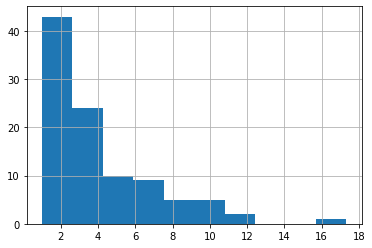

In [12]:
city_average_flights[city_average_flights['average_flights'] < 20]['average_flights'].hist()

# Комментарий наставника
Не соглашусь с выводом ниже. Москва и Питер действительно выглядят исключением из правила, как и  Новосибирск. Но остальные вполне себе рядовые (см. гистгорамму без МСК и Питера). Чаще чем в среднем, но не выбросы, как мне кажется

Кстати, boxplot выше тоже указывает на три выброса. Остально вроде укладывается в какие-то разумные рамки

Выводы:
-----
Все ТОП10 городов по колличеству рейсов являются выбрасами по отношению к совокупной выборке. Их исследование необходимо проводить отдельно от остальных городов. 


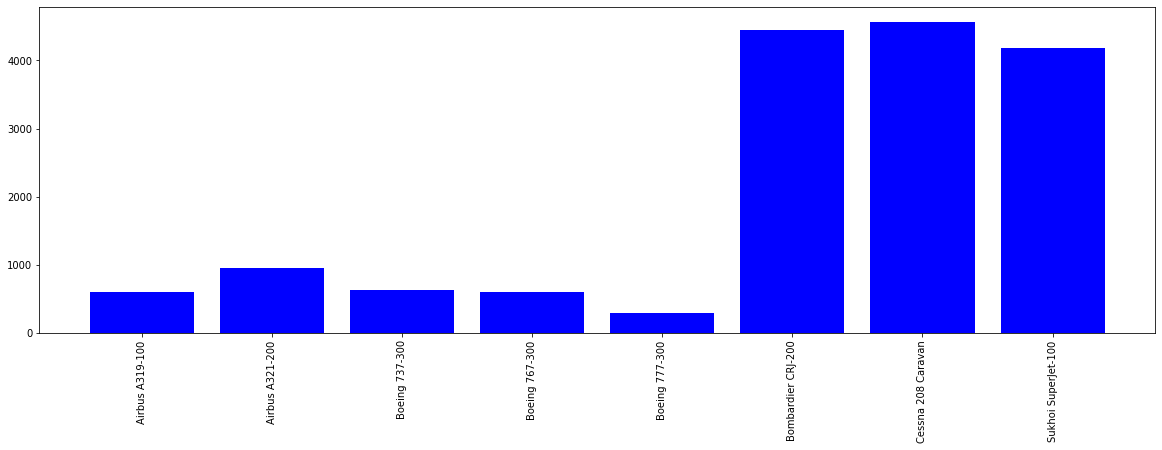

In [13]:
fig, ax = plt.subplots()
ax.bar(model_airplane['model'], model_airplane['flights_amount'], color = 'blue')
fig.set_figwidth(20)    #  ширина и
fig.set_figheight(6)    #  высота "Figure"
plt.xticks(rotation='vertical')
plt.show()

Вывод
----
   1. Большое количество рейсов делают самолеты марок Bombardier CRJ-200, Cessna 208 Caravan, Sukhoi SuperJet-100. Их численность до 100 пассажиров
   2. Малое количество рейсов делают самолеты, в которых количество пассажиров превышает 100 

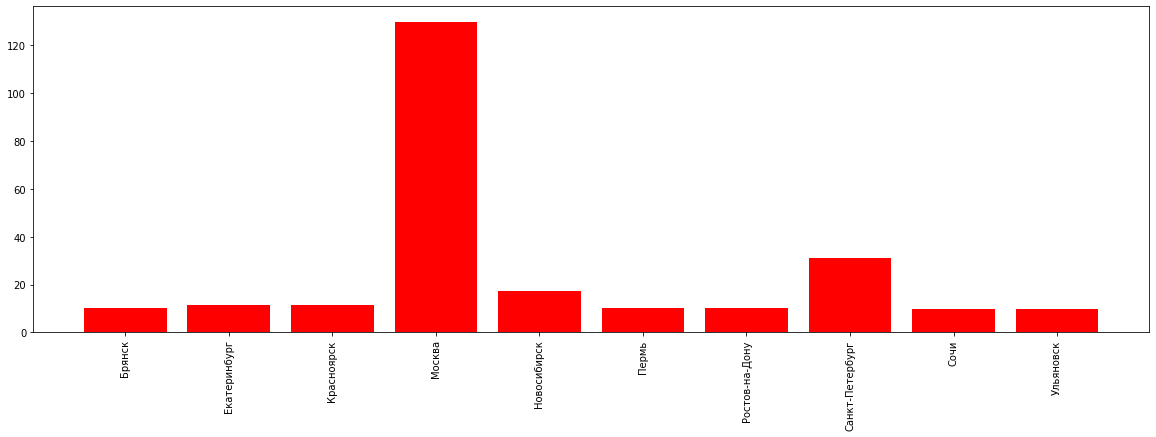

In [14]:
fig, ax = plt.subplots()
ax.bar(city_average_flights_TOP_10['city'], city_average_flights_TOP_10['average_flights'], color = 'red')
fig.set_figwidth(20)    #  ширина и
fig.set_figheight(6)    #  высота "Figure"
plt.xticks(rotation='vertical')
plt.show()


_PS не могли бы вы подсказать как в данном коде повернуть подписи по оси X на 90%_

# Комментарий наставника
Если нет внутреннего дискомфота, то можно на ты обращаться :)

Добавил код `plt.xticks(rotation='vertical')`. Не знаю, можно ли изящнее (без вызова отдельного метода, а просто параметром при построении), но кажется нельзя

Вывод
----
   1. Наибольшее колличество рейсов в Москву, Санкт-Петербург и Новосибирск. 
   2. В остальные горрода среднедневное количество рейсов находится в диапазоне от 9 до 12.
   3. Пробуя ответить на вопрос: "Почему данные города обладают таким большим среднедневным колличеством рейсов в сентябре?" 
   
Точно ответить не могу, так как не достаточно данных. Однако могу предположить:
   -  6 из 10 городов относятся к крпнейшим городам РФ: [Москва, Санкт-Петербург, Новосибирск, Екатеренбург, Перьм, Ростов-на-Дону](http://www.statdata.ru/largest_cities_russia)
   - Московские аэропорты являются крупнейшими узловыми аэропортами РФ
   - [7 перечисленных городов являются обладателями крупнейших аэропортами по итогам 2018 г](https://ru.wikipedia.org/wiki/%D0%A1%D0%BF%D0%B8%D1%81%D0%BE%D0%BA_%D0%BD%D0%B0%D0%B8%D0%B1%D0%BE%D0%BB%D0%B5%D0%B5_%D0%B7%D0%B0%D0%B3%D1%80%D1%83%D0%B6%D0%B5%D0%BD%D0%BD%D1%8B%D1%85_%D0%B0%D1%8D%D1%80%D0%BE%D0%BF%D0%BE%D1%80%D1%82%D0%BE%D0%B2_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8#2018_%D0%B3%D0%BE%D0%B4)
   - В сентябре продолжается бархатный сезон, соотвественно происходит перемещение туристов.

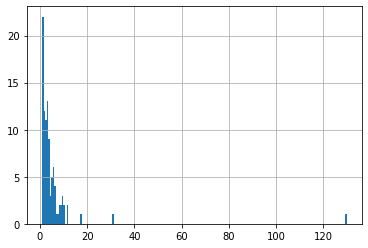

In [15]:
city_average_flights['average_flights'].hist(bins=200)

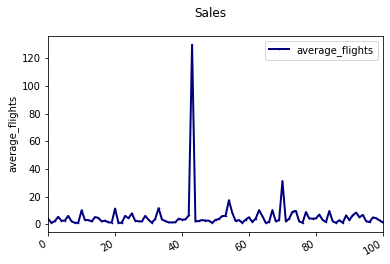

In [16]:
city_average_flights.plot(lw=2, colormap='jet', marker='x', markersize=1, title='Sales', subplots=True)
plt.ylabel('average_flights')
plt.show()

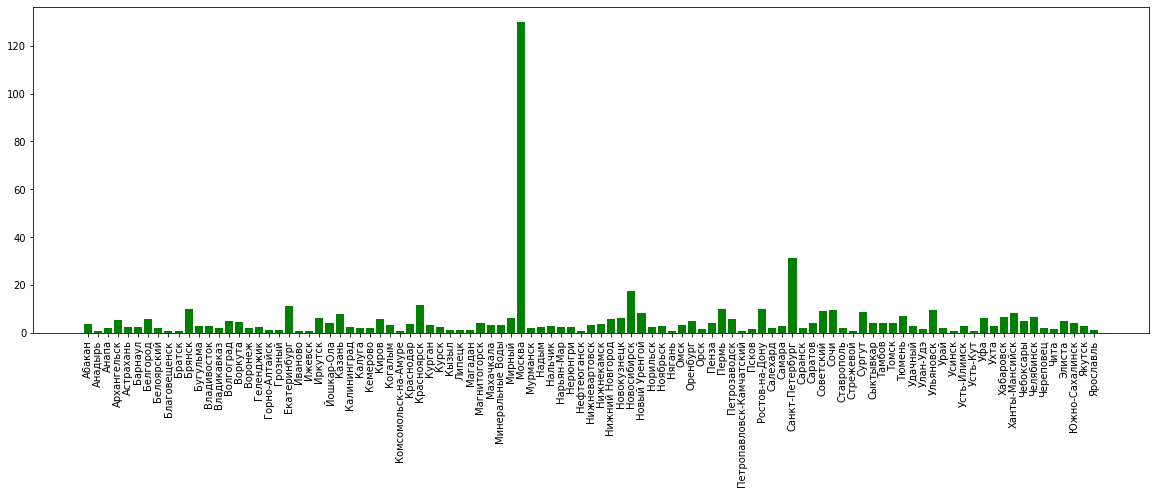

In [17]:
fig, ax = plt.subplots()
ax.bar(city_average_flights['city'], city_average_flights['average_flights'], color = 'green')
fig.set_figwidth(20)    #  ширина и
fig.set_figheight(6)    #  высота "Figure"
plt.xticks(rotation='vertical')
plt.show()

In [18]:
city_average_flights[city_average_flights['average_flights'] <= 3]['average_flights'].count()

52

Вывод
----
Анализируя два предыдущих рисунка можно сделать следующие выводы:
   1. Большинство городов имеют по одному входящему рейсу
   2. Есть выбросы, которые необходимо изучть отдельно
   3. Желательно отдельно изучить города с рейсами до 3 в день (на их долю приходится более 50% городов), для того, чтобы потобрать оптимальный состав моделей самолетов.

------------

# РЕЗЮМЕ по Шагу 4. Аналитика средствами Python

   - импортированы файлы '/datasets/query_1.csv' и '/datasets/query_3.csv';
   - изучены данные в них;
   - проверены типы данных на корректность;
   - выбраны топ-10 городов по количеству рейсов;
   - построины графики: модели самолетов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов
  
------------

ВЫВОДЫ
----
   1. Данные и заполнение в таблице об информации о типах самолетов корректно. Данные и заполнение в таблице об информации о городах и средних показателях количества авиорейсов заполненны корректно.
   2. Выбросы данных отсуствуют в таблице об информации о типах самалетов и колличестве сделанных ими рейсов. 
   3. В таблице об информации о городах и средних показателях количества авиорейсов существуют выброс данных по среднему количеству рейсов. Выборы проходят выше границы 8,805 количество среднедневных полетов.
   4. Можно сделать вывод о том: что самым используемой моедлью самолета для пассажирских авиоперевозок являются среднемагисральные самолеты с вместимостью от 50 до 150 пассажиров.
   4. Существуют маршруты, где осуществляется интенсивный пассажиропоток, с чем связано использование моделей, которые вмещают значительное число пассажиров от 180 до 550 пассажиров
   5. Существуют направления где используются модели с маллой пассажирской вместимостью.
   6. Можно сделать вывод, что в сентябре существуют как очень популярные направления, когда среднедневное количесво рейсосв составляет около 130 и не популярные направления, когда среднее количество рейсов в день равно 1.
   
   Анализ графиков 
   
   1. Большое количество рейсов делают самолеты марок Bombardier CRJ-200, Cessna 208 Caravan, Sukhoi SuperJet-100. Их численность до 100 пассажиров.
   2. Малое количество рейсов делают самолеты, в которых количество пассажиров превышает 100.
   3. Наибольшее колличество рейсов в Москву, Санкт-Петербург и Новосибирск. 
   4. В остальные горрода среднедневное количество рейсов находится в диапазоне от 9 до 12.
   
Пробуя ответить на вопрос: "Почему данные города обладают таким большим среднедневным колличеством рейсов в сентябре?" точно ответить не могу, так как не достаточно данных. Однако могу предположить:
   -  6 из 10 городов относятся к крпнейшим городам РФ: [Москва, Санкт-Петербург, Новосибирск, Екатеренбург, Перьм, Ростов-на-Дону](http://www.statdata.ru/largest_cities_russia)
   - Московские аэропорты являются крупнейшими узловыми аэропортами РФ
   - [7 перечисленных городов являются обладателями крупнейших аэропортами по итогам 2018 г](https://ru.wikipedia.org/wiki/%D0%A1%D0%BF%D0%B8%D1%81%D0%BE%D0%BA_%D0%BD%D0%B0%D0%B8%D0%B1%D0%BE%D0%BB%D0%B5%D0%B5_%D0%B7%D0%B0%D0%B3%D1%80%D1%83%D0%B6%D0%B5%D0%BD%D0%BD%D1%8B%D1%85_%D0%B0%D1%8D%D1%80%D0%BE%D0%BF%D0%BE%D1%80%D1%82%D0%BE%D0%B2_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8#2018_%D0%B3%D0%BE%D0%B4)
   - В сентябре продолжается бархатный сезон, соотвественно происходит перемещение туристов.
   
   5. Большинство городов имеют по одному входящему рейсу
   6. Есть выбросы, которые необходимо изучть отдельно
   7. Желательно отдельно изучить города с рейсами до 3 в день (на их долю приходится более 50% городов), для того, чтобы потобрать оптимальный состав моделей самолетов.

------------

# Шаг 5. Проверка гипотезы средствами Python

Проверьте гипотезу: «Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время».

------------

In [19]:
festivals_flying = pd.read_csv('/datasets/query_last.csv')

In [20]:
festivals_flying.info()
festivals_flying.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
week_number      10 non-null int64
ticket_amount    10 non-null int64
festival_week    3 non-null float64
festival_name    3 non-null object
dtypes: float64(1), int64(2), object(1)
memory usage: 448.0+ bytes


,week_number,ticket_amount,festival_week,festival_name
0,30,43568,30.0,Park Live
1,31,51034,31.0,Пикник Афиши
2,32,51675,NaN,NaN
3,33,51378,NaN,NaN
4,34,51492,NaN,NaN


Как видно Существуют пропущенные данные. Заполнять мы их не будем т.к. знаем, что они "реально" отсутсвуют.

Для проверки гипотизы создадим две таблицы. Колличество билетов во время фестиваля и колличество билетов без фестивалей.

In [21]:
festivals_flying_yes = festivals_flying[festivals_flying['festival_week'] > 0]

In [22]:
festivals_flying_yes.head()

,week_number,ticket_amount,festival_week,festival_name
0,30,43568,30.0,Park Live
1,31,51034,31.0,Пикник Афиши
6,36,51386,36.0,Видфест


In [23]:
festivals_flying['festival_week'] = pd.to_numeric(festivals_flying['festival_week'], errors='coerce')
festivals_flying['festival_week'] = festivals_flying['festival_week'].fillna(0)

In [24]:
festivals_flying_no = festivals_flying[festivals_flying['festival_week'] == 0]

In [25]:
festivals_flying_no.head()

,week_number,ticket_amount,festival_week,festival_name
2,32,51675,0.0,NaN
3,33,51378,0.0,NaN
4,34,51492,0.0,NaN
5,35,51360,0.0,NaN
7,37,51670,0.0,NaN


При определении соотвествия среднего  пользовательский рейтинга жанров Action и Sports различается
   - H0 - Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время
   - Н1 - Средний спрос на билеты во время фестивалей отличается от среднего спроса на билеты в обычное время
   - Пороговое значение alpha 5%

In [26]:
alpha = 0.05
resault = st.ttest_ind(festivals_flying_no.ticket_amount, festivals_flying_yes.ticket_amount)

In [27]:
'p-значение:', resault.pvalue

('p-значение:', 0.09688869045922928)

In [28]:
if resault.pvalue < alpha:
    print('Средний спрос на билеты во время фестивалей отличается от среднего спроса на билеты в обычное время')
else:
    print(' Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время')

 Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время


Вывод
----

Как видно спрос на билеты в обычные дни не отличается от спроса в дни проведения фестивалей. __Однако, стоит отметить, что анализировали мы полеты в Москву в августе, в которую  среднедневное количество прилетов в сентябре составило около 130 . Возможно при анализе другого города мы получили бы другие результаты.__

------------

# РЕЗЮМЕ ПО ПРОДЕЛАННОЙ РАБОТЕ

   - импортированы файлы '/datasets/query_1.csv' и '/datasets/query_3.csv';
   - изучены данные в них;
   - проверены типы данных на корректность;
   - выбраны топ-10 городов по количеству рейсов;
   - построины графики: модели самолетов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
   - Проверена гипотеза: «Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время».
  
------------

ВЫВОДЫ
----
   1. Данные и заполнение в таблице об информации о типах самолетов корректно. Данные и заполнение в таблице об информации о городах и средних показателях количества авиорейсов заполненны корректно.
   2. Выбросы данных отсуствуют в таблице об информации о типах самалетов и колличестве сделанных ими рейсов. 
   3. В таблице об информации о городах и средних показателях количества авиорейсов существуют выброс данных по среднему количеству рейсов. Выборы проходят выше границы 8,805 количество среднедневных полетов.
   4. Можно сделать вывод о том: что самым используемой моедлью самолета для пассажирских авиоперевозок являются среднемагисральные самолеты с вместимостью от 50 до 150 пассажиров.
   4. Существуют маршруты, где осуществляется интенсивный пассажиропоток, с чем связано использование моделей, которые вмещают значительное число пассажиров от 180 до 550 пассажиров
   5. Существуют направления где используются модели с маллой пассажирской вместимостью.
   6. Можно сделать вывод, что в сентябре существуют как очень популярные направления, когда среднедневное количесво рейсосв составляет около 130 и не популярные направления, когда среднее количество рейсов в день равно 1.
   
   Анализ графиков 
   
   1. Большое количество рейсов делают самолеты марок Bombardier CRJ-200, Cessna 208 Caravan, Sukhoi SuperJet-100. Их численность до 100 пассажиров.
   2. Малое количество рейсов делают самолеты, в которых количество пассажиров превышает 100.
   3. Наибольшее колличество рейсов в Москву, Санкт-Петербург и Новосибирск. 
   4. В остальные горрода среднедневное количество рейсов находится в диапазоне от 9 до 12.
   
Пробуя ответить на вопрос: "Почему данные города обладают таким большим среднедневным колличеством рейсов в сентябре?" точно ответить не могу, так как не достаточно данных. Однако могу предположить:
   -  6 из 10 городов относятся к крпнейшим городам РФ: [Москва, Санкт-Петербург, Новосибирск, Екатеренбург, Перьм, Ростов-на-Дону](http://www.statdata.ru/largest_cities_russia)
   - Московские аэропорты являются крупнейшими узловыми аэропортами РФ
   - [7 перечисленных городов являются обладателями крупнейших аэропортами по итогам 2018 г](https://ru.wikipedia.org/wiki/%D0%A1%D0%BF%D0%B8%D1%81%D0%BE%D0%BA_%D0%BD%D0%B0%D0%B8%D0%B1%D0%BE%D0%BB%D0%B5%D0%B5_%D0%B7%D0%B0%D0%B3%D1%80%D1%83%D0%B6%D0%B5%D0%BD%D0%BD%D1%8B%D1%85_%D0%B0%D1%8D%D1%80%D0%BE%D0%BF%D0%BE%D1%80%D1%82%D0%BE%D0%B2_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8#2018_%D0%B3%D0%BE%D0%B4)
   - В сентябре продолжается бархатный сезон, соотвественно происходит перемещение туристов.
   
   5. Большинство городов имеют по одному входящему рейсу
   6. Есть выбросы, которые необходимо изучть отдельно
   7. Желательно отдельно изучить города с рейсами до 3 в день (на их долю приходится более 50% городов), для того, чтобы потобрать оптимальный состав моделей самолетов.
   
   
   12. Как видно спрос на билеты в обычные дни не отличается от спроса в дни проведения фестивалей. __Однако, стоит отметить, что анализировали мы полеты в Москву в августе, в которую  среднедневное количество прилетов в сентябре составило около 130 . Возможно при анализе другого города мы получили бы другие результаты.__